In [4]:
import numpy as np
import pandas as pd
%pylab inline
np.random.seed(1234)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# $ \\ $
# _"But the power of instruction is seldom of much efficacy, except in those happy dispositions where it is almost superfluous."_
# Edward Gibbon
# $ \\ $


# Recall, our definition of ML:
##  "Machine learning is the field of study that gives computers the ability to learn without being explicitly programmed"
     - Arthur Samuel, 1959
### Not actually his words, though the definition is fine

# $ \\ $
# $ \\ $
# And our workflow for ML in practice

![](ml_workflow.jpg)

# The most important modeling parts
 - ## Finding a model that captures our understanding of reality
 - ## Finding a data representation (features) that let the model capture the bahavior

# $ \\ $
# Feature Engineering

## __Feature engineering is a preprocessing step in supervised machine learning and statistical modeling which transforms raw data into a more effective set of inputs. Each input comprises several attributes, known as features. By providing models with relevant information, feature engineering significantly enhances their predictive accuracy and decision-making capability.__
# $ \\ $
- ## We know something about the structure of the problem
- ## We create combinations of the data (features) that embed this knowledge
- ## These features improve the models

# $ \\ $
# $ \\ $
# Imagine we have some 2-D data

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


def plot_raw_data(dataset):
    X, y = dataset
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=ListedColormap(["#FF0000", "#0000FF"]),
        edgecolors="k",
        s=100,
    )
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    plt.title("Classification Data", fontsize=16)


def plot_classifiers(dataset, classifiers, names, plot_orig=True):
    i = 1
    h = 0.02  # step size in the mesh
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    plt.figure(figsize=(16, 7))
    num_plots = len(classifiers)
    if plot_orig:
        num_plots += 1
    ax = plt.subplot(
        1,
        num_plots,
        i,
    )
    if plot_orig:
        ax.set_title("Input data", fontsize=16)
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="k",
            s=100,
        )
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(1, num_plots, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name, fontsize=16)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("accuracy=%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

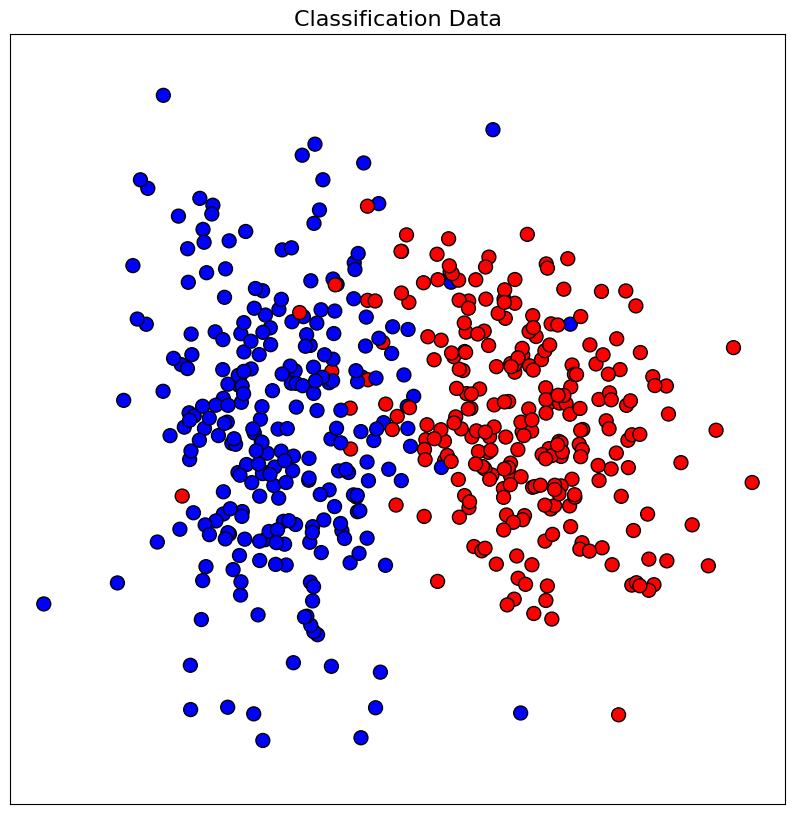

In [6]:
X, y = make_classification(
    n_samples=512,
    class_sep=1.8,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

plot_raw_data(linearly_separable)


## How should we fit this data to distinguish between <span style="color:red">*red*</span> and <span style="color:blue">*blue*</span>?
# $ \\ $
# $ \\ $
# $ \\ $

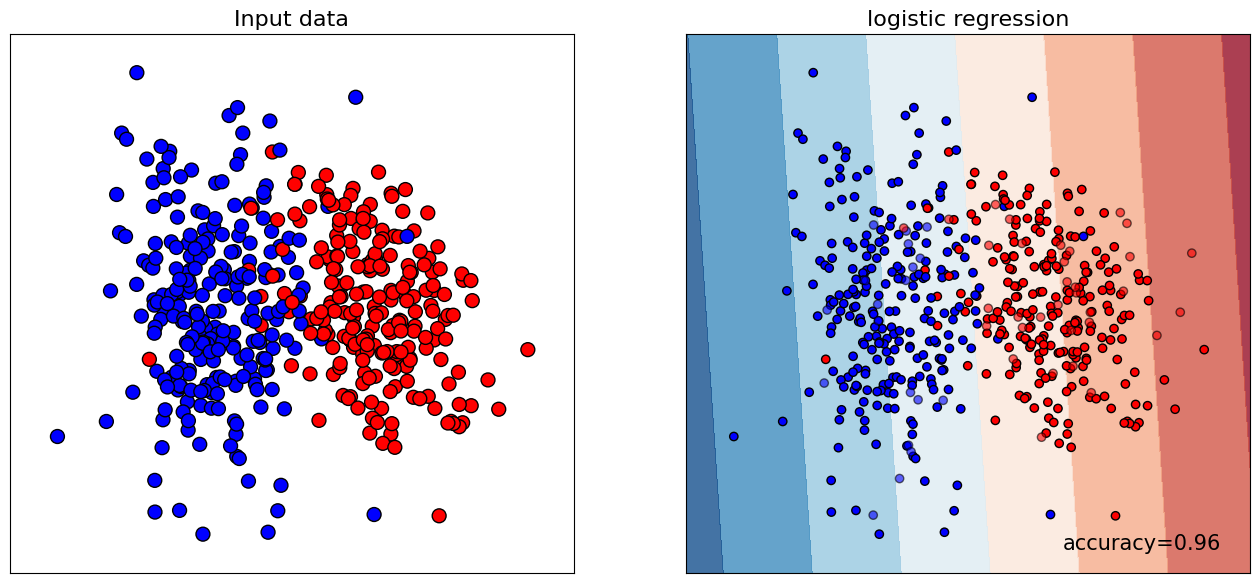

In [7]:
names = ["logistic regression"]
classifiers = [LogisticRegression()]

plot_classifiers(linearly_separable, classifiers, names, plot_orig=True)

## Consider another dataset

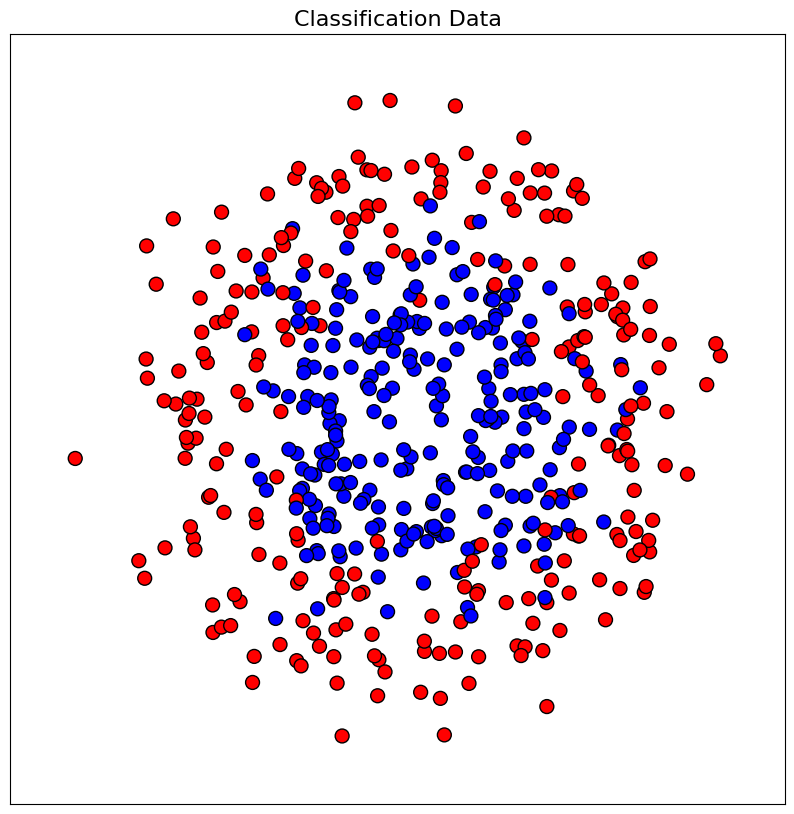

In [8]:
ds = make_circles(n_samples=512, noise=0.2, factor=0.5, random_state=1)

X, y = ds
X = StandardScaler().fit_transform(X)

plot_raw_data((X, y))


# Questions:
 - ## Is this simpler than the data above?
 - ## How would we distinguish between <span style="color:red">*red*</span> and <span style="color:blue">*blue*</span>?

# $ \\ $
# $ \\ $
# $ \\ $

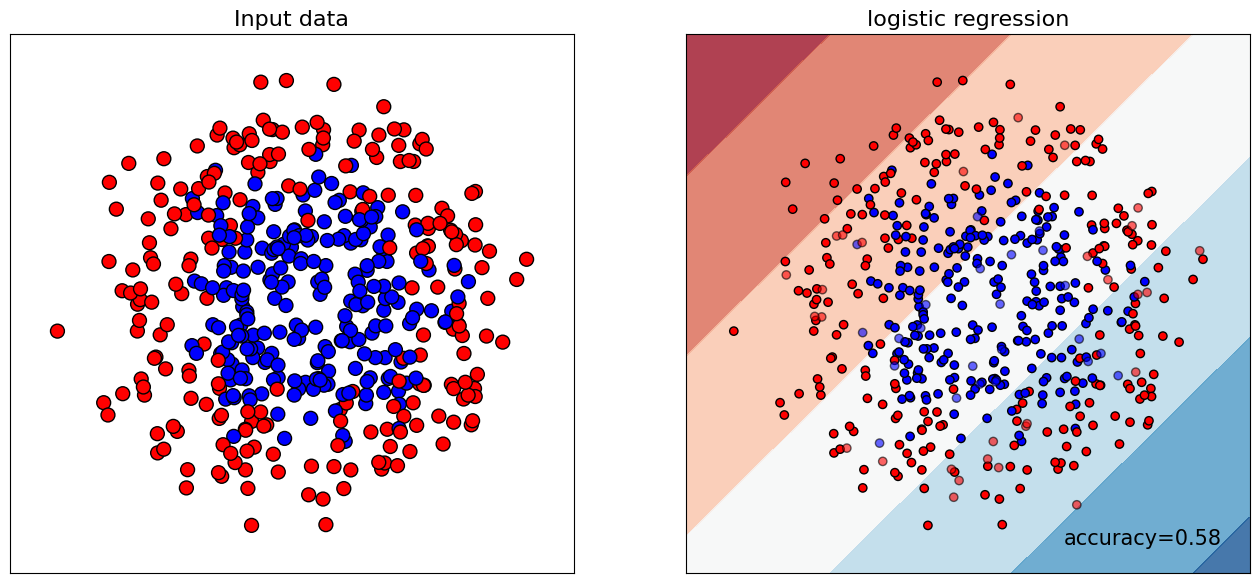

In [9]:
names = ["logistic regression", ]
classifiers = [LogisticRegression(),]

plot_classifiers(ds, classifiers, names, plot_orig=True)

## We have a problem:
 - ## The data are, in some way, simpler than above (really only a function of $r$)
 - ## Our simplest model can't capture the behavior

# $ \\ $
# $ \\ $

## Consider another example

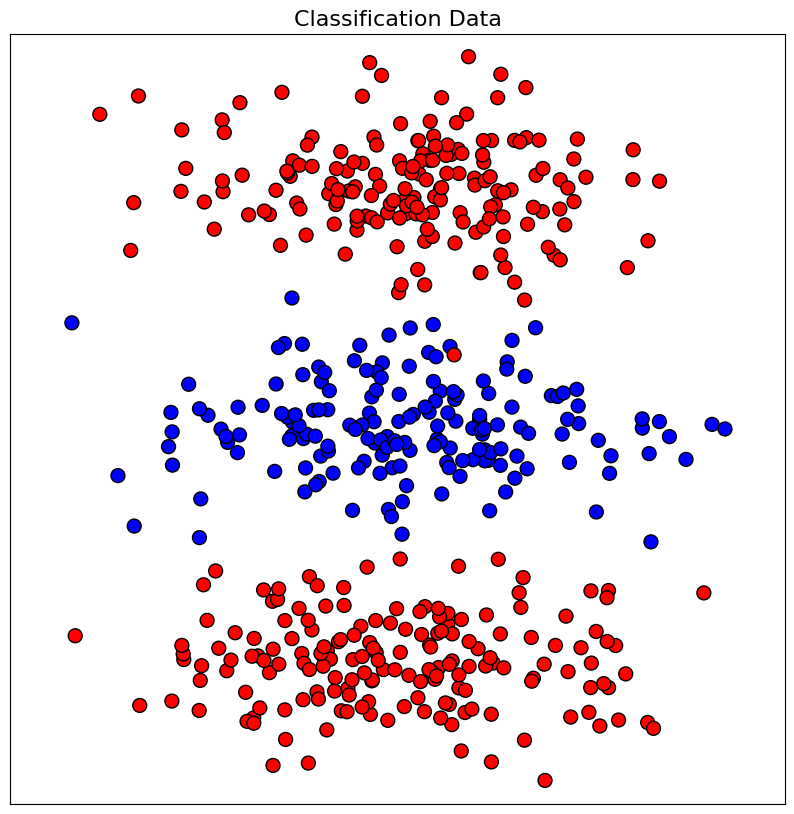

In [10]:
from sklearn.datasets import make_blobs
cntrs = np.array([[0, 5], [0, -5], [0, 0]])
x, y = make_blobs(n_samples=512, cluster_std=[1.0, 1.0, 1.0], centers=cntrs, random_state=1234)
y[y == 0] = 1
y = y - 1

plot_raw_data((x, y))

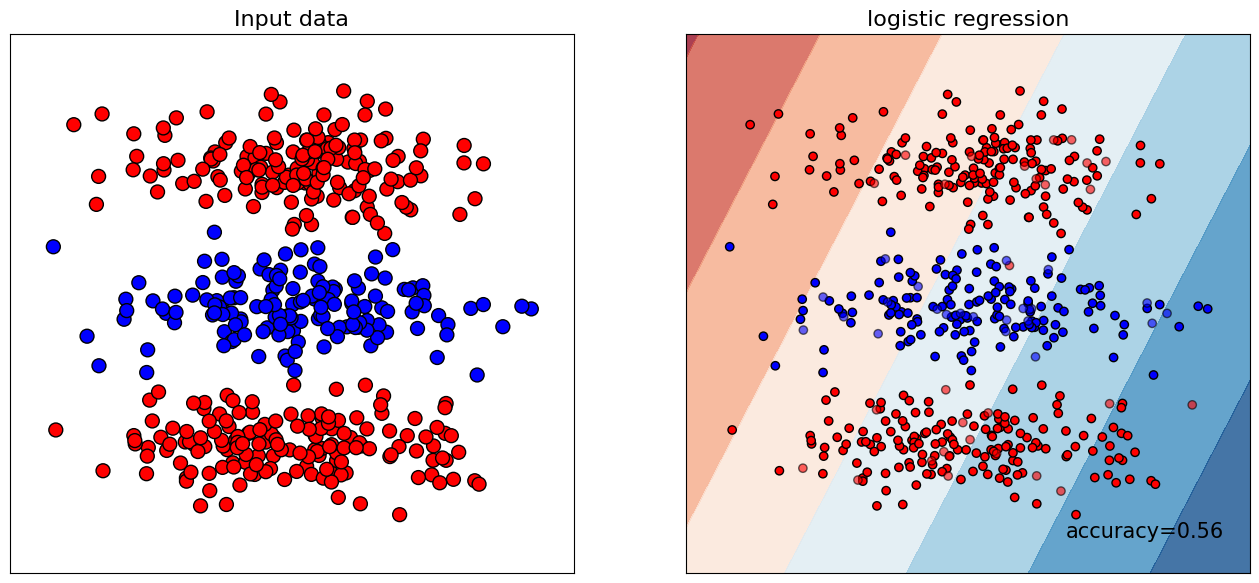

In [11]:
names = ["logistic regression", ]
classifiers = [LogisticRegression(),]

plot_classifiers((x,y), classifiers, names, plot_orig=True)

## What can we do to make our model better fit our data?

# $ \\ $
# $ \\ $
# $ \\ $


## In this case a good ML practitioner would
 - ## engineer features that make the data easier to model
 - ## use a model that can more easily find this better representation by itself

# $ \\ $
# $ \\ $
## What do these look like for our case
 - ## What can we do to our data?
 - ## What other models might we choose?

# $ \\ $

## In this case
# $ \\ $
# $ \\ $

## Three blobs
 - ## Polynomial function of $x_1$ and $x_2$ to capture curvey behavior
 - ## Or a better model would be a decision tree, which can make multiple horizontal decision boundaries.

# $ \\ $
## Circle Data
 - ## Polynomial function of $x_1$ and $x_2$ to capture curvey behavior
   - ## In this case it's perhaps more obvious
 - ## Need a model that allows for curved boundaries (hard)


# $ \\ $
# $ \\ $
## Let's try to engineer features for the circles

/Users/bluebird/develop/15.S08_applied_nlp/venv_nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


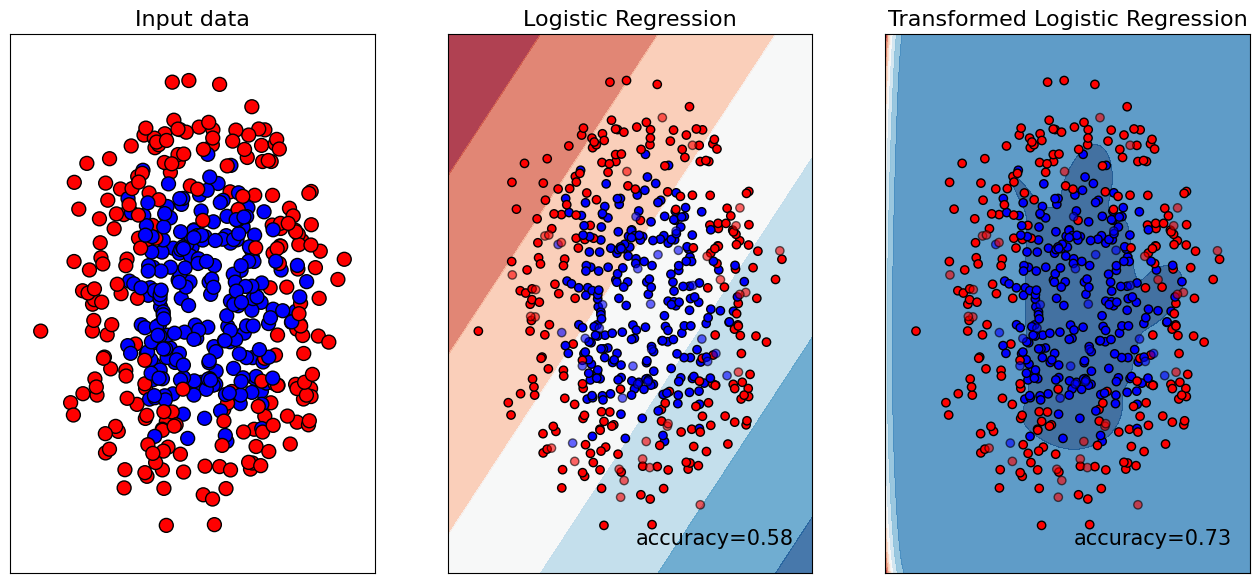

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

ds = make_circles(n_samples=512, noise=0.2, factor=0.5, random_state=1)
X, y = ds
X = StandardScaler().fit_transform(X)

poly_transformer = PolynomialFeatures(degree=26)


pline = make_pipeline(poly_transformer, LogisticRegression())
classifiers = [LogisticRegression(), pline]
names = ["Logistic Regression", "Transformed Logistic Regression"]
plot_classifiers(ds, classifiers, names, plot_orig=True)

## What are the downsides of this approach?
# $ \\ $
# $ \\ $
 - ## Do we have enough data to fit a 26th degree polynomial?
 - ## Did we overfit (look at the decision boundary)
 - ## Polynomials are in principle able to capture anything, but they might be inefficient!

# $ \\ $
# $ \\ $
# $ \\ $
## Maybe there are better transformations to do!

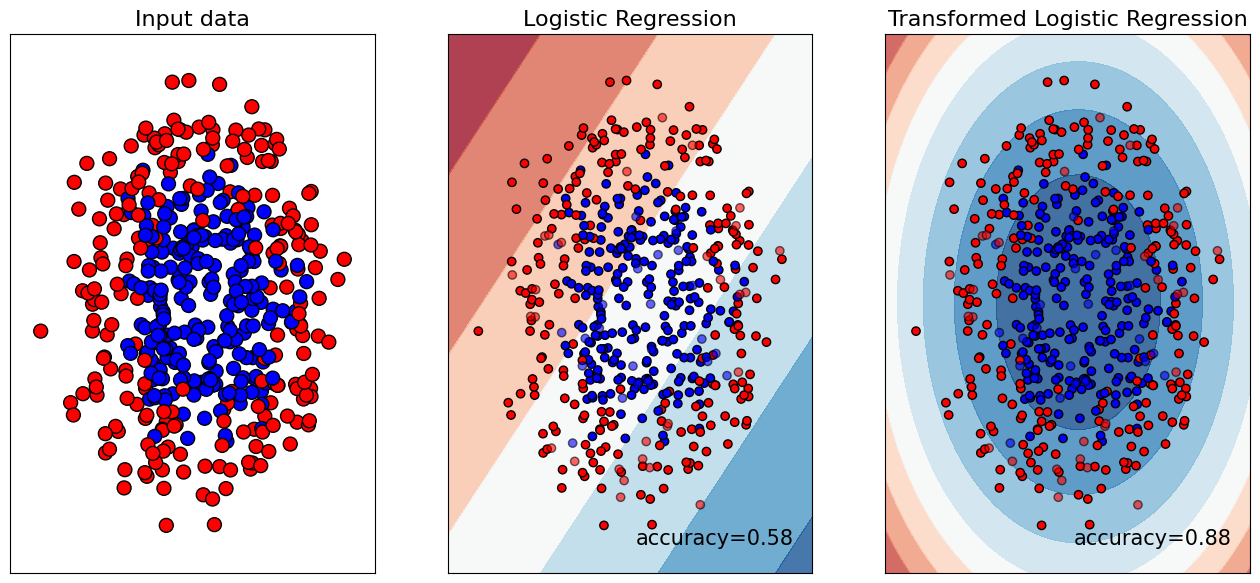

In [13]:
from sklearn.preprocessing import FunctionTransformer


def dist_from_origin(x):
    return (x[:, 0] ** 2 + x[:, 1] ** 2)[:, np.newaxis]


dist_transformer = FunctionTransformer(dist_from_origin)


pline = make_pipeline(dist_transformer, LogisticRegression())
classifiers = [LogisticRegression(), pline]
names = ["Logistic Regression", "Transformed Logistic Regression"]
plot_classifiers(ds, classifiers, names, plot_orig=True)

# There is a fundamental and necessary compatibility between a model and the representation of the data
 - ## When the two are incompatible we fail to capture even simple behavior


$ \\ $
$ \\ $
# All ML methods find "better" representations of data for a given problem
 - ## E.g. Logistic regression finding linear combinations of features that are better at predicting a given outcome
 - ## E.g. a decision tree finds a set of y/n questions that are better at prediction outcomes

$ \\ $
$ \\ $
# But we typically have to "help" the models by doing feature engineering
 - ## E.g. transforming the bag of words into TFIDF
 - ## E.g. standardizing data to have 0 mean and unit variance

# $ \\ $
# $ \\ $
# And sometimes that can be hard
 - ## BOW / TFIDF: `The quick brown fox jumps over the lazy dog`
 - ## BOW / TFIDF: `The quick brown dog jumps over the lazy fox`

# $ \\ $
# $ \\ $
## Different data representations are amenable to different modeling techniques
 - ## E.g. Tree-based methods are invariant to scaling features
 - ## Linear regression does not do well with correlation between covariates

# $ \\ $
# $ \\ $
![ml-evolution](ml-evolution-1.jpg)
# $ \\ $
# $ \\ $
![ml-evolution](ml-evolution-2.jpg)
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# As our problems get more complex, it gets harder to feature engineer
# $ \\ $
# $ \\ $
## There are cases where the boundary is clear / intuitive. Wouldn't it be nice if we could build models that capture arbitrary behavior?

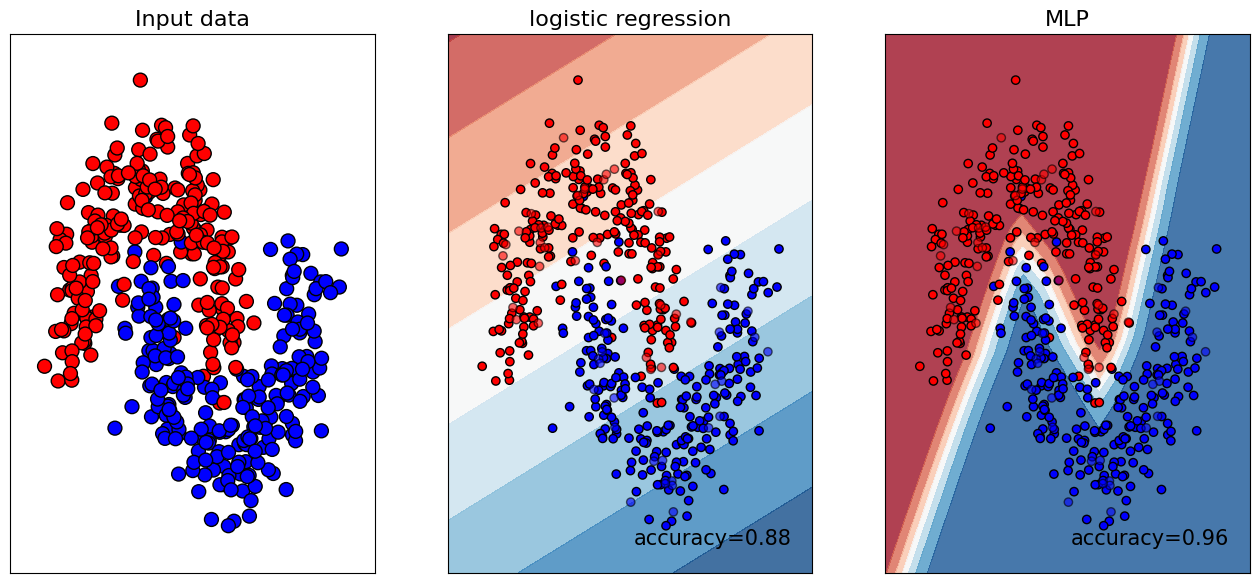

In [14]:
ds = make_moons(n_samples=512, noise=0.2, random_state=1)
X, y = ds
X = StandardScaler().fit_transform(X)

names = ["logistic regression", "MLP"]
classifiers = [LogisticRegression(), MLPClassifier(alpha=0.1, max_iter=1000)]
plot_classifiers((X, y), classifiers, names, plot_orig=True)

In [15]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices()
for device in physical_devices:
    print(f"Device: {device}")

Device: PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


### Only run this if you are testing your GPU.


# Deep Learning / Neural Networks
 - ## Use a layered / stacked approach to machine learning the best representation
 - ## Each layer learns the best way to represent the data from the previous one
 - ## All of the layers are learned at once / together for the specific problem

# $ \\ $


![deep-learning](deep-learning.png)
# $ \\ $
# $ \\ $
# The ML evolution continues
# $ \\ $
# $ \\ $
[here](https://docs.google.com/presentation/d/14K1-_4wWnFwP2XMr_dI_m2artH1wJh9DO5euJzQ-uY4/edit)
![ml-evolution](ml-evolution.jpg)

# $ \\ $
# $ \\ $
## What would a "layered" approach look like to solve the circles data?
# $ \\ $
# $ \\ $
## It could be
 - ## Layer 1: take $x_1$ and $x_2$ to some power $p$ (ie compute $r^{d}$ for some $d$)
 - ## Layer 2: use logistic regression to fit the data
 - ## Find the combination of $d$ and the logistic coefficients that give the best results

# $ \\ $
# $ \\ $
## In reality, it will be hard to be this prescriptive
 - ## This is a very contrived example for our contrived data.
 - ## We'll need more general ways of layering representations

# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# How do we do deep learning?
# $ \\ $
# $ \\ $

# Recall, our favorite tools
 - ## Keras
 - ## Scikit-learn

# $ \\ $
## Why the hell did I need to learn keras?
# $ \\ $
![ml-workflow](SKLearn_Keras.png)
# $ \\ $
# $ \\ $
## The basic keras building block is a `Layer`
# $ \\ $
 - ## and they're great for stacking together to make deep models

# $ \\ $
# $ \\ $
# $ \\ $
# We call these models of stacked numerical operations Neural Networks
 - ## AKA artificial neural netorks
 - ## AKA deep nets

# $ \\ $
# $ \\ $
# Neural networks are
 - ## Extremely powerful
 - ## Capable of learning arbitrary (well-behaved) functions
 - ## Roughly based on how our neurons (brain cells) work
    - ### this is fairly irrelevant for understanding them
 - ## The method used for the vast majority of modern machine learning


# $ \\ $
# $ \\ $
# $ \\ $




# Building Artificial Neural Networks
# $ \\ $
# $ \\ $
## Recall:
 - ## As problems and data get more complex, feature engineering gets progressively harder
 - ## We we build feature engineering into our model directly by stacking together operations
 - ## We don't want to (and can't) be perscriptive with our operations
 - ## $x_{1}^{n} + x_{2}^{n} \rightarrow $ logistic regression with coefficients $\theta$ doesn't work


# $ \\ $
# $ \\ $
## We need our building blocks to be
 - ## Powerful (able to learn lots of different functions)
 - ## Fast (we're going to do lots of operations)
 - ## Naturally able to operate on vectors / matrices of numbers
 - ## Able to change the `shape` of data to find the right next representation
   - ## e.g. $ \left( x_1, x_2 \right)  \rightarrow x_{1}^{n} + x_{2}^{n}$ is $\mathbb{R}^2 \rightarrow \mathbb{R}^1$

# $ \\ $
# $ \\ $
# $ \\ $


## We'll use matrix multiplication!
 - ## Fast: people have spent a lot of time optimizing matmul
 - ## Naturally able to operate on vectors and matrices $\overrightarrow{y} = A\overrightarrow{x}$
 - ## Can change the shape of data: $A_{m \times n} B_{n \times p} = C_{m \times p}$

# $ \\ $
## Problem: matrix multiplication doesn't stack
 - ## $A_{m \times n} B_{n \times p} C_{p \times q}... Z_{u \times v} \equiv O_{m \times v}$


# $ \\ $
# $ \\ $
## Basic building block is a combination
 - ## Matrix multiplication and some NONLINEAR function

# $ \\ $

## E.g.
 - ## matrix multiplication ($\mathbb{R}^{n}\rightarrow \mathbb{R}^{m}$)
 - ## sigmoid $\sigma (x)$ ($\mathbb{R}^{m}\rightarrow \mathbb{R}^{m}$)

# $ \\ $
## In this example, how many parameters would the building block have?
# $ \\ $
# $ \\ $
 - ## $m \times n$ matrix has $mn$ parameters
 - ## The activation function may have an unknown number of parameters (e.g. maybe $n$)

# $ \\ $
## NB
 - ## Sometimes the matrix multiplication is called a `kernel`
 - ## Sometimes the nonlinear function is called an `activation`



# $ \\ $
# $ \\ $
## In fact, we've already seen a neural network
 - ## Logistic regression is just a single iteration of matrix multiplication followed by a nonlinear function

# $ \\ $
## We have already seen the most common neural network building block
 - ## the keras `Dense` layer is just a dense matrix (all elements non-zero) and a nonlinear function




In [16]:
from keras.layers import Dense
Dense?

Init signature:
Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    lora_rank=None,
    **kwargs,
)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`).

Note: If the input to the layer has a rank greater than 2, `Dense`
computes the dot product between the `inputs` and the `kernel` along the
last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
For example, if input has dimensions `(batch_size, d0, d1)`, then we create

## `Dense` implements the operation:
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `output = activation(dot(input, kernel) + bias)`
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; where `activation` is the element-wise activation function
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; passed as the `activation` argument, `kernel` is a weights matrix
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; created by the layer, and `bias` is a bias vector created by the layer
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (only applicable if `use_bias` is `True`). These are all attributes of `Dense`.

# $ \\ $
# $ \\ $

## In practice
 - ## We'll have only a handful of different matrix operations and nonlinear function
 - ## We'll need to mix and match and stack them to build a model that solves our problem

# $ \\ $
# $ \\ $
## Who has seen a picture like this?
![neural network](neural-net.jpg)
# $ \\ $
# $ \\ $

# $ \\ $
# Optimizing Neural Networks
# $ \\ $
![](ml_workflow.jpg)
# $ \\ $
## Recall: matrix operation + nonlinear function
 - ## A layer will have $\mathcal{O}(mn)$ parameters
 - ## A model can have dozens of layers
 - ## We have a lot of parameters to tweak

# $ \\ $
# $ \\ $
## Recall how keras will solve this:
 - ## Numerical optimization with SGD
 - ## We used a cousin of SGD called ADAM



# $ \\ $
## Stochastic Gradient Descent
 - ## Estimate gradient of loss function wrt to each parameter $\frac{\partial J}{\partial \theta}$
 - ## Update parameters in direction of steepest decrease in loss $\propto \frac{\partial J}{\partial \theta}$

<img src="sgd.png" alt="drawing" width="800"/>

# $ \\ $
## Measuring $\frac{\partial J}{\partial \theta}$
 - ## We have millions/billions of parameters
 - ## Too slow to do $\left( \frac{\partial J}{\partial \theta_{i}}\right)_{\theta_{j\neq i}} = \frac{J(\theta + \Delta \theta_i) - J(\theta)}{\Delta \theta_i}$
 - ## Clever trick: choose nonlinear functions with easy derivatives so that we know $\frac{\partial J}{\partial \theta}$ once we've calculated $J(\theta)$
 - ## Linear functions already have nice derivatives


# $ \\ $
# $ \\ $
![nice derivatives](nice-derivatives.jpg)
# $ \\ $
# $ \\ $
#
$$\sigma(x) = \frac{1}{1 + e^{-x}} \rightarrow \frac{d\sigma}{dx}=\sigma(x)(1-\sigma(x)) $$
# $ \\ $
#
$$\mathrm{ReLU}'(x)=
\begin{cases}
  0, & \text{if}\ x < 0 \\
  1, & \text{otherwise}
\end{cases}$$
# $ \\ $
# $ \\ $
## In both cases knowing $\mathrm{Act}(x)$ tell you $\frac{d\mathrm{Act}}{dx}$
# $ \\ $
# $ \\ $
# $ \\ $
## Procedure for SGD
 - ## Take a small `batch` of data (because it's too costly to use all of it)
 - ## Calculate $J(\theta)$ on the batch of data
 - ## Use the rules from the nonlinear function to calculate $\frac{\partial J}{\partial \theta}$
 - ## Update parameters in direction of steepest decrease of loss $\theta \Rightarrow \theta + \alpha \frac{\partial J}{\partial \theta}$
 - ## Repeat on new data until some stopping condition is met (and hope you're at the bottom of the loss surface)

<img src="sgd.png" alt="drawing" width="800"/>

# $ \\ $
# $ \\ $
## NB: in $\theta \Rightarrow \theta + \alpha \frac{\partial J}{\partial \theta}$ , $\alpha$ is often called the `learning rate`: it is the rate at which we should learn to update our parameters
# $ \\ $
# $ \\ $

### An aside on the mathematics of machine learning in general and deep learning/neural nets in particular
- #### We will not have time in this course to review all the subtleties of neural nets, including initialization problems, vanishing gradients, etc.
- #### If you are interested, Andrew Ng's course at Stamford is an excellent introduction to these problems. https://see.stanford.edu/Course/CS229
- #### also https://youtube.com/playlist?list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&feature=shared
- #### While deep learning currently dominates the ML-sphere, there are many other ML techniques that are useful in other areas of finance, including return prediction, etc.

## Deep learning in practice:
 - ## We will largely be able to assume that SGD/ADAM will work
 - ## We will see that we'll have to spend time making sure we don't overfit

## Our primary job in designing models is to stitch together the right matrix operations and nonlinear functions to capture the behavior we want!
- ### There are some very clever ideas and matrix manipulations that underpin LLMs
- ### We will start with the basics and work up from there!

# $ \\ $
# $ \\ $
# $ \\ $

## Neural networks for deep learning
 - ## Made of up layers (mathematical operations)
 - ## Good choice for building deep models because they can be stacked to learn sequential representations
 - ## In practice, are the only way deep learning is done


# $ \\ $
# $ \\ $

# As problem complexity and data increase, the previous paradigm of feature engineering becomes difficult
# $ \\ $
# $ \\ $
# $ \\ $
# Why is deep learning is so popular right now?
 - ## Because it works

# $ \\ $
# $ \\ $
![yoda](snarky-yoda.jpg)
# $ \\ $
# $ \\ $
# Why is deep learning is so effective right now?
 - ## Data is larger and more available
 - ## Compute power is larger and more available.


# $ \\ $
# $ \\ $
# arXiv preprint publications by topic
![arxiv publications](arxiv-stats.png)

# $ \\ $
# $ \\ $
# Recap:
## Deep Learning
 - ## A layered approach to ML
 - ## Learn the representation together with the model simultaneously
   - ## Particularly important for text, where finding the right representation is really hard
 - ## Eliminates the hardest part of ML, feature engineering
 - ## Can be done effectively with neural networks because we can stack them together
 - ## Keras is a good tool for it because it allows us to layer together operations
 - ## Our job in model selection and design is to find the right matrix operations / nonlinear functions that capture the behavior we want

# $ \\ $
# $ \\ $
# $ \\ $


# Let's return to a classification problem: sentiment analysis
## How should we tackle it?
# $ \\ $
# $ \\ $
# $ \\ $
## Steps
 - ## Load the data
 - ## turn words into numbers using the bag of words approach (`CountVectorizer`)
 - ## Construct a simple model to solve the problem
 - ## fit the model

In [17]:
# restart
import numpy as np
import pandas as pd
%pylab inline
np.random.seed(1234)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [18]:
import os
import glob
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import tensorflow.keras.backend as K

from sklearn.feature_extraction.text import CountVectorizer

In [19]:
import sys
sys.path.insert(0, ".")
from helpers import load_imdb_data_text


In [20]:
# Load the IMDB data and print the number of train and test documents
(train_docs, y_train), (test_docs, y_test) = load_imdb_data_text('aclImdb/')
print('found {} train docs and {} test docs'.format(len(train_docs), len(test_docs)))

found 25000 train docs and 25000 test docs


In [21]:
vec = CountVectorizer(lowercase=True, max_features=50000)
vec.fit(train_docs)
term_document_matrix_train = vec.transform(train_docs)
term_document_matrix_test = vec.transform(test_docs)
print(term_document_matrix_train.shape, term_document_matrix_test.shape)

(25000, 50000) (25000, 50000)


# $ \\ $
# $ \\ $
# Recall: our job is to build the right set of matrix operations / nonlinear functions that can learn the behavior we want
# $ \\ $
# $ \\ $
## What layer / operation should we use?
# $ \\ $
# $ \\ $
# $ \\ $
## We have a 50k-dimensional input, and we want to learn a 1-d output
# $ \\ $
## We use a `Dense` layer because all input dimensions are connected to the output
# $ \\ $
## We want our output to be a probability between 0 and 1 so we can use a sigmoid

In [22]:
K.clear_session()
text_input = Input(shape=(term_document_matrix_train.shape[1],))
#text_input = Input(shape=(50000,1))
output = Dense(1, activation='sigmoid')(text_input)
model = Model(text_input, output)


## This should look familiar!
 - ## This is just logistic regression!

# $ \\ $
# $ \\ $

## How many parameters does this model have?
# $  \\ $
# $  \\ $
## How many parameters in the weights matrix? Bias?
# $  \\ $
# $  \\ $

In [23]:
term_document_matrix_train.shape[1] * 1 + 1 == model.count_params()

True

In [24]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        50,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,001 (195.32 KB)

 Trainable params: 50,001 (195.32 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile("adam", loss="binary_crossentropy", metrics=["acc"])

In [26]:
model.fit(
    term_document_matrix_train,
    y_train,
    epochs=5,
    batch_size=512,
    validation_data=(term_document_matrix_test, y_test),
)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - acc: 0.7003 - loss: 0.6258 - val_acc: 0.8289 - val_loss: 0.5084
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - acc: 0.8693 - loss: 0.4511 - val_acc: 0.8567 - val_loss: 0.4397
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.8963 - loss: 0.3775 - val_acc: 0.8657 - val_loss: 0.4024
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - acc: 0.9120 - loss: 0.3312 - val_acc: 0.8718 - val_loss: 0.3782
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - acc: 0.9208 - loss: 0.2973 - val_acc: 0.8739 - val_loss: 0.3619


In [27]:
from sklearn.metrics import confusion_matrix, f1_score
y_predict = model.predict(term_document_matrix_test).squeeze() > 0.5
cm = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:\n', pd.DataFrame(cm), '\n')
print(f'f1 score = {f1_score( y_test, y_predict):.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix:
        0      1
0  11137   1363
1   1789  10711 

f1 score = 0.8717


## What is logistic regression?
 - ## Shallowest possible neural network: a single transformation

In [28]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        50,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,005 (585.96 KB)

 Trainable params: 50,001 (195.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 100,004 (390.64 KB)

In [30]:
from IPython.display import Image
from tensorflow.keras.utils import model_to_dot

def plot_model_in_notebook(model):
    ''' 
    Change the location of the dot program to the correct location for your computer
    '''
    return Image(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='/usr/local/bin/dot', format='png'))

plot_model_in_notebook(model)


FileNotFoundError: [Errno 2] "/usr/local/bin/dot" not found in path.

## Hypothesis: By allowing for a deeper network (more layers) we can learn an intermediate representation that is more useful.
 - ## I.e. the feature engineering will be done for us!

# $ \\ $
# $ \\ $
## We can make deeper networks by stacking similar objects together
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $


In [28]:
K.clear_session()
text_input = Input(shape=(term_document_matrix_train.shape[1],))
hidden_state = Dense(16, activation="relu")(text_input)  # <- THIS
output = Dense(1, activation="sigmoid")(hidden_state)
model = Model(text_input, output)
model.compile("adam", loss="binary_crossentropy", metrics=["acc"])

# How many parameters does our new model have?
# $ \\ $
# $ \\ $
# $ \\ $

In [31]:
num_hidden = 16
layer_1_params = term_document_matrix_train.shape[1] * num_hidden + num_hidden
print(layer_1_params)
layer_2_params = num_hidden * 1 + 1
print(layer_2_params)
total_params = layer_1_params + layer_2_params
total_params == model.count_params()

800016
17


True

In [30]:
total_params

800033

In [32]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       800,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 800,033 (3.05 MB)

 Trainable params: 800,033 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
plot_model_in_notebook(model)

ImportError: You must install pydot (`pip install pydot`) for model_to_dot to work.

## This should make you uncomfortable!

In [37]:
total_params / term_document_matrix_train.shape[0]

32.00132

In [38]:
model.fit(
    term_document_matrix_train,
    y_train,
    epochs=5,
    batch_size=512,
    validation_data=(term_document_matrix_test, y_test),
)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - acc: 0.7743 - loss: 0.5213 - val_acc: 0.8726 - val_loss: 0.3411
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - acc: 0.9359 - loss: 0.2264 - val_acc: 0.8853 - val_loss: 0.3007
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - acc: 0.9603 - loss: 0.1584 - val_acc: 0.8844 - val_loss: 0.2982
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - acc: 0.9747 - loss: 0.1163 - val_acc: 0.8826 - val_loss: 0.3030
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - acc: 0.9819 - loss: 0.0903 - val_acc: 0.8801 - val_loss: 0.3181


<Axes: >

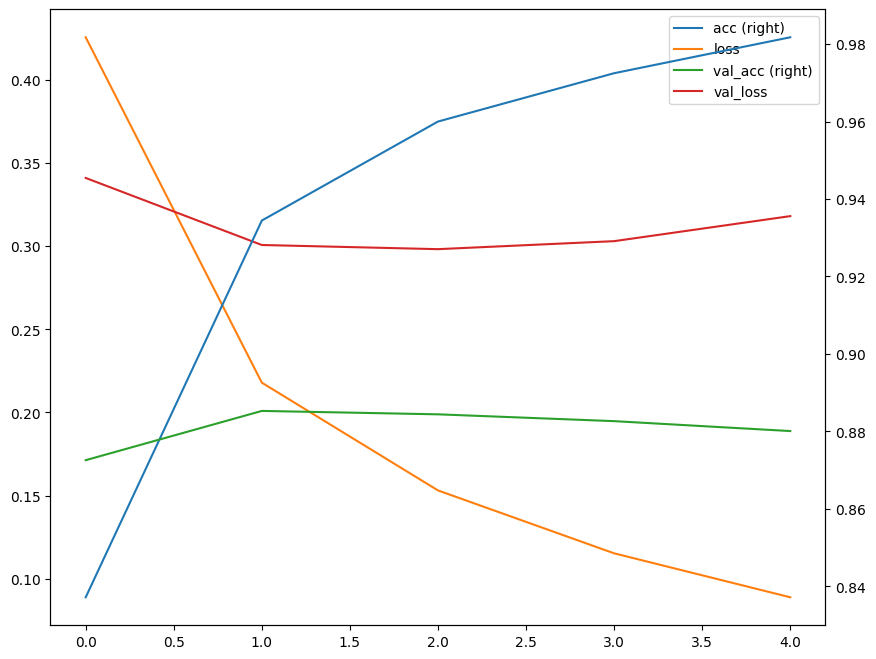

In [39]:
pd.DataFrame(model.history.history).plot(figsize=(10,8), secondary_y=["acc", "val_acc"])

In [40]:

y_predict = model.predict(term_document_matrix_test).squeeze() > 0.5
cm = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:\n', pd.DataFrame(cm), '\n')
print(f'f1 score = {f1_score( y_test, y_predict):.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix:
        0      1
0  11170   1330
1   1668  10832 

f1 score = 0.8784


# What did we do?
 - ## Added a "hidden layer"
 - ## Increased the complexity of the representation of the data
 - ## Increased the number of free parameters by >10x
 - ## Got a modest performance increase

In [41]:
K.clear_session()
text_input = Input(shape=(term_document_matrix_train.shape[1],))
hidden_state = Dense(16, activation="relu")(text_input)  # <- THIS
hidden_state = Dense(16, activation="relu")(hidden_state)  # <- THIS
output = Dense(1, activation="sigmoid")(hidden_state)
model = Model(text_input, output)
model.compile("adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       800,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 800,305 (3.05 MB)

 Trainable params: 800,305 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
plot_model_in_notebook(model)

In [42]:
model.fit(
    term_document_matrix_train,
    y_train,
    epochs=3,
    batch_size=512,
    validation_data=(term_document_matrix_test, y_test),
)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - acc: 0.7038 - loss: 0.5945 - val_acc: 0.8711 - val_loss: 0.3734
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - acc: 0.9324 - loss: 0.2594 - val_acc: 0.8883 - val_loss: 0.3023
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - acc: 0.9614 - loss: 0.1534 - val_acc: 0.8773 - val_loss: 0.3226


<Axes: >

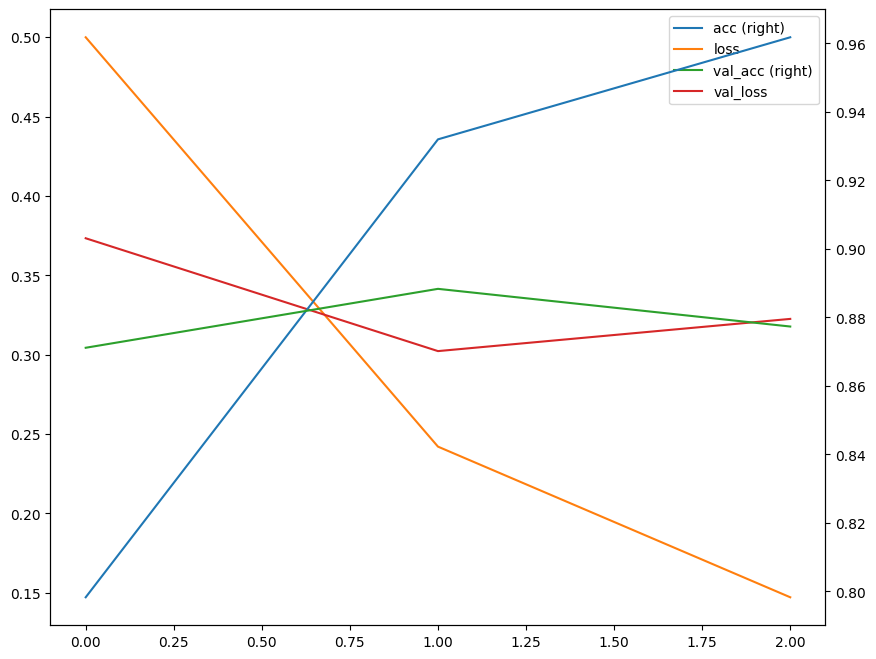

In [43]:
pd.DataFrame(model.history.history).plot(figsize=(10,8), secondary_y=["acc", "val_acc"])

## For now, we will see diminishing returns adding more and more layers
# $ \\ $
# $ \\ $
# $ \\ $


# The rest of deep learning for NLP is just
## $ \\ $
## 1. Finding better / more complex matrix operations to stack together (for more complex problems)
 - ## e.g. more than just `Dense` layers

## 2. Finding better representations for text for our networks
 - ## E.g. not just BOW


# $ \\ $
# $ \\ $
# We will also cover the mechanics of doing deep learning for NLP
 - ## preventing overfitting
 - ## Finding ways to handle lots of data
 - ## Making training happen faster
 - ## Making training more robust

# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $

# Preventing Overfitting
## Different models have different ways of doing it
 - ## Logistic regression: coefficient regularization L1: absolute value L2: sum of squared
 - ## Decision trees: limit depth, minimum samples in a leaf, etc

# $ \\ $
# $ \\ $
# Neural networks are very prone to overfitting
 - ## $N_{params} >> N_{observations}$

# $ \\ $
# How can we prevent overfitting in a neural network?
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $
## Preventing Overfitting
 - ## Reduce the network size (number of parameters)
 - ## Add constraints like `$L_2$` regularization
 - ## Add mathematical operation (layers) to combat overfitting
 - ## Design networks that are smart and have implicit regularization in them
 - ## Be clever wtih our optimizer
   - ## ie don't let `ADAM` run away
 - ## Be vigilant with cross validation

# $ \\ $
# $ \\ $
## Neural network: Reduce the number of parameters
 - ## There is nothing canonical about the size of the hidden layer
 - ## It has a large impact on the number of parameters for large input sizes
# $ \\ $
# $ \\ $

In [44]:
K.clear_session()
text_input = Input(shape=(term_document_matrix_train.shape[1],))
hidden_state = Dense(8, activation="relu")(text_input)  # <- THIS
output = Dense(1, activation="sigmoid")(hidden_state)
model = Model(text_input, output)
model.compile("adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       400,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 400,017 (1.53 MB)

 Trainable params: 400,017 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
plot_model_in_notebook(model)

In [45]:
K.clear_session()
text_input = Input(shape=(term_document_matrix_train.shape[1],))
hidden_state = Dense(256, activation="relu")(text_input)  # <- THIS
output = Dense(1, activation="sigmoid")(hidden_state)
model = Model(text_input, output)
model.compile("adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,800,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,800,513 (48.83 MB)

 Trainable params: 12,800,513 (48.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
plot_model_in_notebook(model)

## More "traditional" regularization:
 - ## Just like we can add $L_{1}$ or $L_{2}$ norm to logistic regression, we can add it to layers in a network
 - ## $L_2$ is often called `weight decay` because it causes weights to shrink

In [46]:
Dense?

Init signature:
Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    lora_rank=None,
    **kwargs,
)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`).

Note: If the input to the layer has a rank greater than 2, `Dense`
computes the dot product between the `inputs` and the `kernel` along the
last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
For example, if input has dimensions `(batch_size, d0, d1)`, then we create

## What can we regularize in a `Dense` layer?
 - ## The weight matrix (`input_dim` x `output_dim`)
 - ## The bias matrix (`output_dim`)
 - ## The activations (`output_dim`)

# $ \\ $
## These all do different things

In [47]:
from tensorflow.keras.regularizers import l2, l1, l1_l2

In [48]:
K.clear_session()
text_input = Input(shape=(term_document_matrix_train.shape[1],))
hidden_state = Dense(
    16,
    activation="relu",
    kernel_regularizer=l2(1e-3),
    bias_regularizer=l2(1e-3),
    activity_regularizer=l2(1e-3),# <- THIS
)(
    text_input
)
output = Dense(1, activation="sigmoid")(hidden_state)
model = Model(text_input, output)
model.compile("adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       800,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 800,033 (3.05 MB)

 Trainable params: 800,033 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

## Under the hood, keras will modify the loss function to add the regularization costs

In [49]:
model.fit(
    term_document_matrix_train,
    y_train,
    epochs=5,
    batch_size=512,
    validation_data=(term_document_matrix_test, y_test),
)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - acc: 0.4980 - loss: 0.7224 - val_acc: 0.5000 - val_loss: 0.6964
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - acc: 0.4971 - loss: 0.6958 - val_acc: 0.5000 - val_loss: 0.6945
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - acc: 0.5002 - loss: 0.6943 - val_acc: 0.5000 - val_loss: 0.6939
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - acc: 0.4981 - loss: 0.6938 - val_acc: 0.5000 - val_loss: 0.6936
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - acc: 0.4928 - loss: 0.6936 - val_acc: 0.5002 - val_loss: 0.6935


<Axes: >

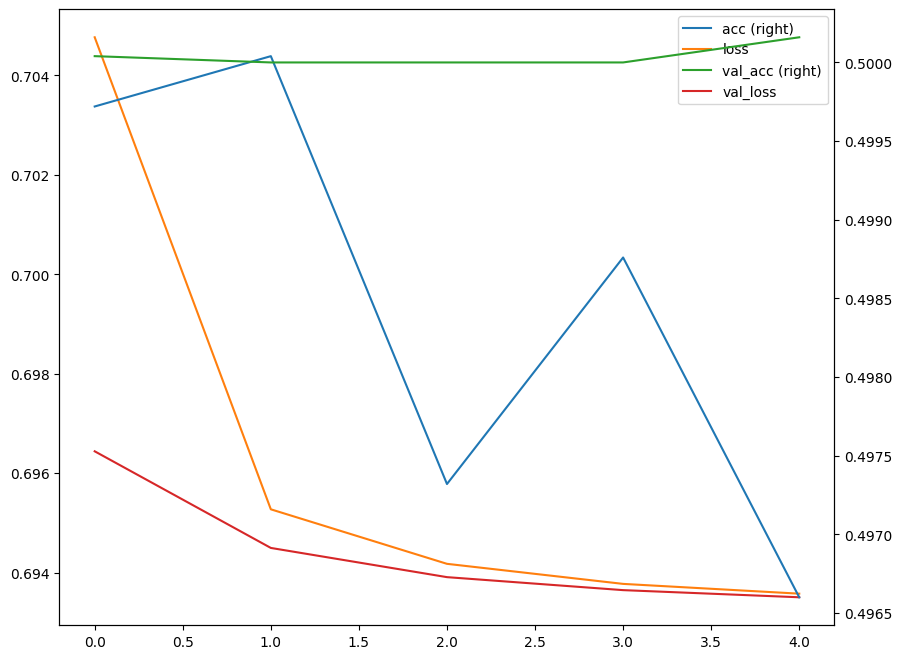

In [50]:
pd.DataFrame(model.history.history).plot(figsize=(10,8), secondary_y=["acc", "val_acc"])

# $ \\ $
# $ \\ $
# $ \\ $

# Notice: we are now much less overfit
 - ## Maybe too much regularization because val_performance is lower

# $ \\ $
# $ \\ $
## NB: $L_1$ regularization does NOT give us sparse weights

# Layers dedicated to preventing overfitting: Dropout
## A story about bank tellers
# $ \\ $
![hinton](./hinton.jpg)
# $ \\ $
# $ \\ $
## Idea:
 - ## Randomly select some of the neurons and set their outputs to zero
 - ## After lots of training, only the ones that really matter will survive

# $ \\ $

In [33]:
from tensorflow.keras.layers import Dropout
# Dropout?

In [53]:
K.clear_session()
dropout_layer = Dropout(0.5, input_shape=(2,))
data = np.arange(10).reshape(5, 2).astype(np.float32)
data


/Users/bluebird/develop/15.S08_applied_nlp/venv_nlp/lib/python3.10/site-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


array([[0., 1.],
       [2., 3.],
       [4., 5.],
       [6., 7.],
       [8., 9.]], dtype=float32)

In [54]:

outputs = dropout_layer(K.variable(data), training=True)
outputs = K.eval(outputs)
outputs

array([[ 0.,  0.],
       [ 0.,  6.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0., 18.]], dtype=float32)

## Notice: the values got bigger!! Why?
# $ \\ $
# $ \\ $
## Notice: `training=True`. Why?
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $
# Putting it all together

In [55]:
K.clear_session()
text_input = Input(shape=(term_document_matrix_train.shape[1],))
hidden_state = Dense(
    32,
    activation="relu",
    kernel_regularizer=l2(1e-4),
)(text_input)
hidden_state = Dropout(0.2)(hidden_state)
hidden_state = Dense(
    16,
    activation="relu",
)(hidden_state)
hidden_state = Dropout(0.2)(hidden_state)
output = Dense(1, activation="sigmoid")(hidden_state)
model = Model(text_input, output)
model.compile("adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     1,600,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,600,577 (6.11 MB)

 Trainable params: 1,600,577 (6.11 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.fit(
    term_document_matrix_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_data=(term_document_matrix_test, y_test),
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - acc: 0.6965 - loss: 0.5956 - val_acc: 0.8798 - val_loss: 0.3494
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - acc: 0.9118 - loss: 0.2936 - val_acc: 0.8878 - val_loss: 0.3146
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - acc: 0.9470 - loss: 0.1924 - val_acc: 0.8859 - val_loss: 0.3201
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - acc: 0.9679 - loss: 0.1386 - val_acc: 0.8813 - val_loss: 0.3540
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - acc: 0.9797 - loss: 0.1054 - val_acc: 0.8736 - val_loss: 0.4081
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - acc: 0.9851 - loss: 0.0849 - val_acc: 0.8660 - val_loss: 0.4585
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - acc: 0.9894 - loss: 0.0702 - val_acc: 0.8706 - val_loss: 0.4839
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - acc: 0.9929 - loss: 0.0602 - val_acc: 0.8719 - val_loss: 0.5163
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - acc: 0.9941

<Axes: >

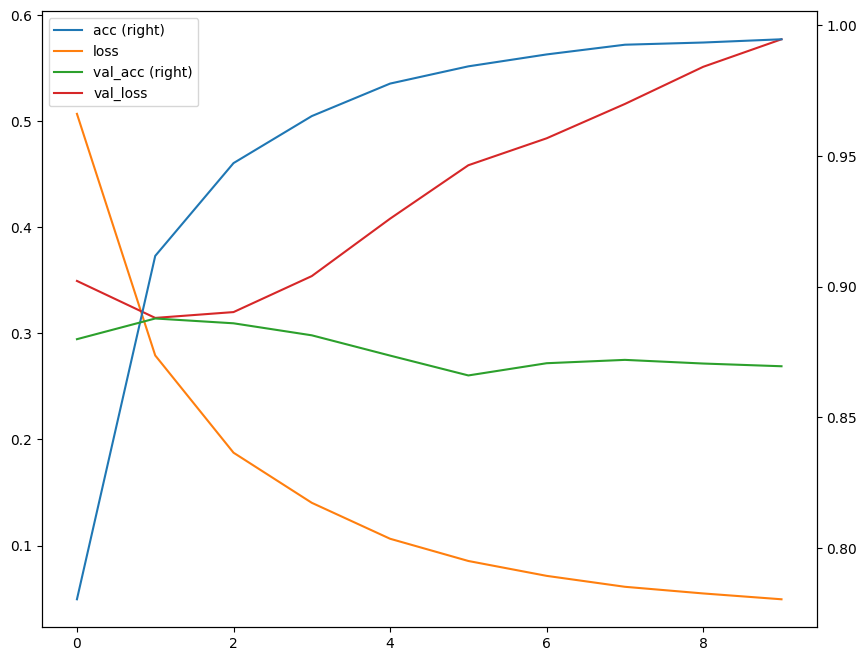

In [57]:
pd.DataFrame(model.history.history).plot(figsize=(10,8), secondary_y=["acc", "val_acc"])

In [58]:
pd.DataFrame(model.history.history)["val_acc"]

0    0.87984
1    0.88776
2    0.88592
3    0.88132
4    0.87356
5    0.86596
6    0.87064
7    0.87192
8    0.87052
9    0.86948
Name: val_acc, dtype: float64

# $ \\ $
# $ \\ $
# $ \\ $
# Using Numerical Optimization Responsibly:
 - ## For how long should we learn?
 - ## How quickly should we learn?

# $ \\ $
## Note: We never chose `epochs` with any care! How should we choose it?
# $ \\ $
# $ \\ $
# $ \\ $
# Idea: keep learning until the validation loss stops decreasing
# $ \\ $
# $ \\ $
# We can actually do better!
## What does it mean if the validation loss is stuck?


<img src="lr-small.png" alt="small LR" style="width:800px;"/>

# $ \\ $
## What happens when the LR is too big?
# $ \\ $

<img src="lr-big.png" alt="big LR" style="width:800px;"/>

# $ \\ $
# $ \\ $


## We may close to a local minimum.
# Idea: If validation loss stops decreasing
 - ## Reduce the learning rate (try to learn more slowly)
 - ## Stop if the the validation loss still doesn't decrease


# $ \\ $
# $ \\ $
## Question: why not just set the learning rate to be small?
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $


In [59]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# EarlyStopping?

In [60]:
ReduceLROnPlateau?

Init signature:
ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=10,
    verbose=0,
    mode='auto',
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.0,
    **kwargs,
)
Docstring:     
Reduce learning rate when a metric has stopped improving.

Models often benefit from reducing the learning rate by a factor
of 2-10 once learning stagnates. This callback monitors a
quantity and if no improvement is seen for a 'patience' number
of epochs, the learning rate is reduced.

Example:

```python
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
model.fit(x_train, y_train, callbacks=[reduce_lr])
```

Args:
    monitor: String. Quantity to be monitored.
    factor: Float. Factor by which the learning rate will be reduced.
        `new_lr = lr * factor`.
    patience: Integer. Number of epochs with no improvement after which
        learning rate will be reduced.
    verbose: Integer. 0: quiet, 1: update m

In [61]:
K.clear_session()
text_input = Input(shape=(term_document_matrix_train.shape[1],))
hidden_state = Dense(
    32,
    activation="relu",
    kernel_regularizer=l2(1e-4),
)(text_input)
hidden_state = Dropout(0.2)(hidden_state)
hidden_state = Dense(
    16,
    activation="relu",
)(hidden_state)
hidden_state = Dropout(0.2)(hidden_state)
output = Dense(1, activation="sigmoid")(hidden_state)
model = Model(text_input, output)
model.compile("adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     1,600,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,600,577 (6.11 MB)

 Trainable params: 1,600,577 (6.11 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
lr = ReduceLROnPlateau(patience=1, verbose=True)
es = EarlyStopping(patience=2, verbose=True)

In [63]:

model.fit(
    term_document_matrix_train,
    y_train,
    epochs=30,  # <- we can set this to be high!
    batch_size=512,
    validation_data=(term_document_matrix_test, y_test),
    callbacks=[lr, es]
)

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - acc: 0.7012 - loss: 0.5963 - val_acc: 0.8751 - val_loss: 0.3633 - learning_rate: 0.0010
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - acc: 0.9032 - loss: 0.3070 - val_acc: 0.8859 - val_loss: 0.3119 - learning_rate: 0.0010
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9407 - loss: 0.2071
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - acc: 0.9407 - loss: 0.2069 - val_acc: 0.8858 - val_loss: 0.3178 - learning_rate: 0.0010
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.9653 - loss: 0.1513
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - acc: 0.9652 - loss: 0.1513 - val_acc: 0.8855 - val_loss: 0.3223 - learning_rate: 1.0000e-04
Epoch 4: early stopping


<Axes: >

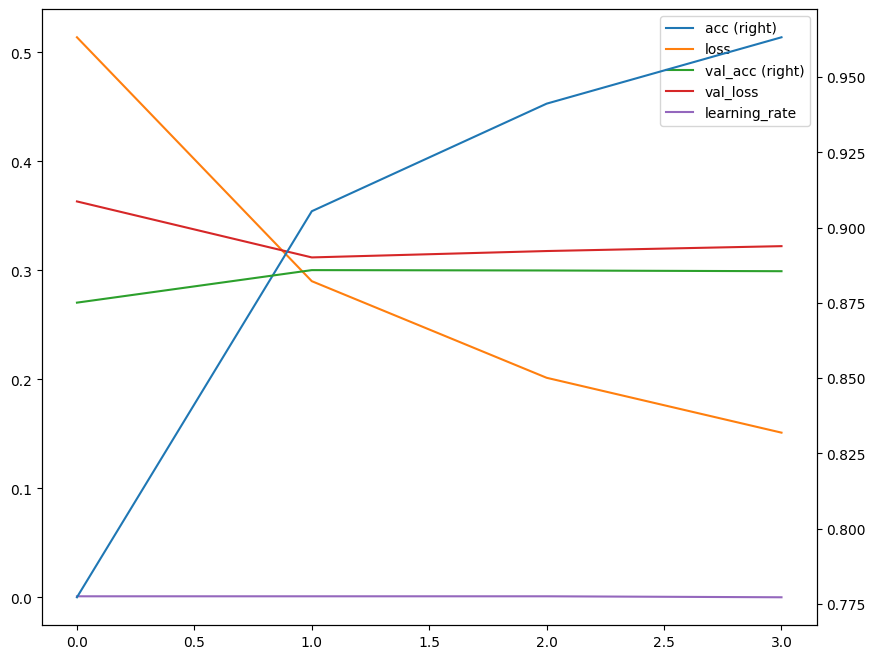

In [64]:
pd.DataFrame(model.history.history).plot(figsize=(10,8), secondary_y=["acc", "val_acc"])

## Notice, the learning rate is in the history!

<Axes: >

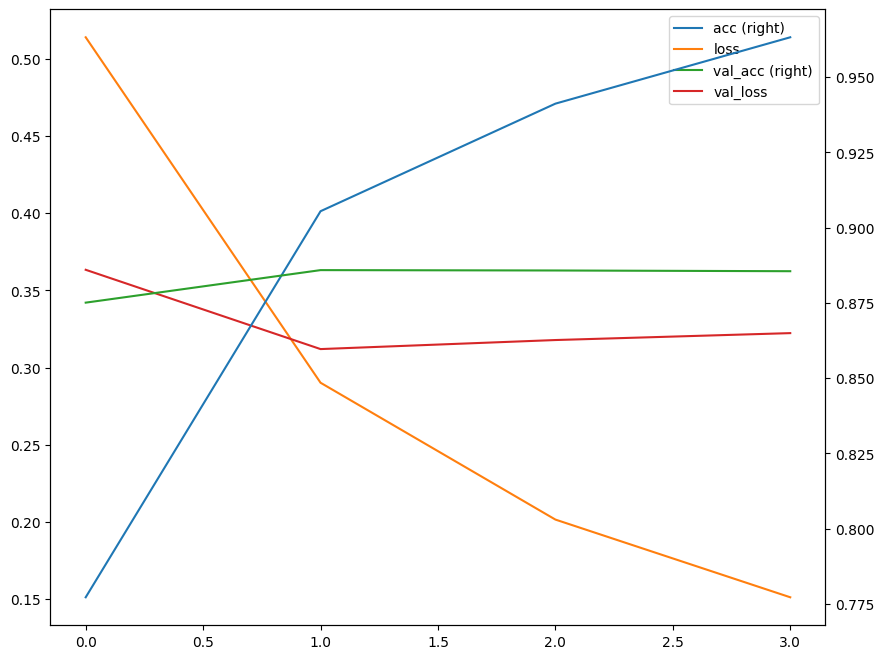

In [65]:
pd.DataFrame(model.history.history).drop("learning_rate", axis=1).plot(
    figsize=(10, 8), secondary_y=["acc", "val_acc"]
)

# $ \\ $
# $ \\ $
# A word about GPUs
 - ## Most of deep learning is matrix operations
 - ## GPUs were designed to do matrix math quickly
 - ## They are an essential part of deep learning because they help with iteration speed.
 - ## Won't be required for this course

## GPUs in practice
 - ## Cloud providers (amazon/google etc) charge about  $\,\$$1/hr for a reasonable GPU machine
 - ## You can build your own for about $1000, which pays if you do this full time.
 - ## GPUs can be a pain to set up
 - ## Once set up `keras` will use it by default?
     - ### Apple machines with Apple silicon (M1-4) require a special version of tensorflow: `tensorflow-metal`
     - https://developer.apple.com/metal/tensorflow-plugin/

# $ \\ $
### To see if your (non-Apple silicon!) computer can see your gpu, from the command prompt
```shell
>> nvidia-smi
```
### See [here](https://medium.com/analytics-vidhya/explained-output-of-nvidia-smi-utility-fc4fbee3b124) for a great explanation of the output
# $ \\ $
### To see if keras can see your gpu
```python
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
```
# $ \\ $
# $ \\ $

### If you do have Apple silicon, this little bit of code will help you verify that tensorflow is using your GPU
```python
import tensorflow as tf

# Enable logging to see device placement
tf.debugging.set_log_device_placement(True)

# List all available physical devices
physical_devices = tf.config.list_physical_devices()
print("Available Physical Devices:")
for device in physical_devices:
    print(f" - {device}")

# Specifically check for GPU devices
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("\nGPU Devices Detected:")
    for gpu in gpus:
        print(f" - {gpu}")
    # Optionally, set TensorFlow to use the first GPU
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(f"TensorFlow is set to use the following GPU: {logical_gpus}")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)
else:
    print("\nNo GPU devices detected. TensorFlow will use the CPU.")

# Perform a test computation to see where it's executed
print("\nRunning a test computation to verify device usage...")

# Define a simple computation
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[7.0, 8.0], [9.0, 10.0], [11.0, 12.0]])
c = tf.matmul(a, b)

print("\nResult of the computation:")
print(c)
```

#### If you're feeling really ambitious, you can try this bit of test code, too:
- ##### Beware! This takes quite some time to run
```python
print(tf.test.gpu_device_name())
print(tf.config.list_physical_devices('GPU'))
cifar = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar.load_data()
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(32, 32, 3),
    classes=100,)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=64)
```

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

# $\\ $
# $\\ $
# $\\ $

# The Power and Flexibility of Deep Learning
## Recall:
 - ## deep learning allows for sequential building of feature representation
 - ## `keras` allows for somewhat arbitrary matrix operations


## The combination is very powerful!
## Our job in designing models is to make operations that will capture the behavior that we want
# $ \\ $
# $ \\ $
# We can
 - ## Make complex networks
 - ## Find new ways to solve problems

# $ \\ $
# $ \\ $
# Tesla's self-driving cars
 - ## approximately 10 different optical cameras
 - ## approximately 30 different tasks:
   - ## lane detection
   - ## traffic light detection
   - ## estimation of speed of car in front

# $ \\ $
# $ \\ $
## Seems pretty hard

In [66]:
# ok to restart
import numpy as np
import pandas as pd

%pylab inline
np.random.seed(1234)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/bluebird/develop/15.S08_applied_nlp/venv_nlp/lib/python3.10/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [34]:
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

In [68]:
num_cameras = 5
num_tasks = 3

K.clear_session()

camera_inputs = [
    Input(shape=(512,), name="cam_{}".format(i)) for i in range(num_cameras)
]

streams = []
for i in range(num_cameras):
    blocks = [
        Dense(32, activation="relu", name="cam{}_b{}".format(i, b)) for b in range(3)
    ]
    stream = blocks[0](camera_inputs[i])
    for b in blocks[1:]:
        stream = b(stream)
    streams.append(stream)

all_streams = Concatenate(name="comb")(streams)
all_streams = Dense(32, activation="relu")(all_streams)
all_streams = Dense(16, activation="relu")(all_streams)

outputs = []
for t in range(num_tasks):
    out = Dense(1, activation="sigmoid")(all_streams)
    outputs.append(out)

model = Model(camera_inputs, outputs)
model.compile("adam", loss=["binary_crossentropy"] * num_tasks)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ cam_0 (InputLayer)  │ (None, 512)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam_1 (InputLayer)  │ (None, 512)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam_2 (InputLayer)  │ (None, 512)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam_3 (InputLayer)  │ (None, 512)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam_4 (InputLayer)  │ (None, 512)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam0_b0 (Dense)     │ (None, 32)        │     16,416 │ cam_0[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam1_b0 (Dense)     │ (None, 32)        │     16,416 │ cam_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam2_b0 (Dense)     │ (None, 32)        │     16,416 │ cam_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam3_b0 (Dense)     │ (None, 32)        │     16,416 │ cam_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam4_b0 (Dense)     │ (None, 32)        │     16,416 │ cam_4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam0_b1 (Dense)     │ (None, 32)        │      1,056 │ cam0_b0[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam1_b1 (Dense)     │ (None, 32)        │      1,056 │ cam1_b0[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam2_b1 (Dense)     │ (None, 32)        │      1,056 │ cam2_b0[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam3_b1 (Dense)     │ (None, 32)        │      1,056 │ cam3_b0[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam4_b1 (Dense)     │ (None, 32)        │      1,056 │ cam4_b0[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam0_b2 (Dense)     │ (None, 32)        │      1,056 │ cam0_b1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam1_b2 (Dense)     │ (None, 32)        │      1,056 │ cam1_b1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam2_b2 (Dense)     │ (None, 32)        │      1,056 │ cam2_b1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam3_b2 (Dense)     │ (None, 32)        │      1,056 │ cam3_b1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cam4_b2 (Dense)     │ (None, 32)        │      1,056 │ cam4_b1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ comb (Concatenate)  │ (None, 160)       │          0 │ cam0_b2[0][0],    │
│                     │                   │            │ cam1_b2[0][0],    │
│                     │                   │            │ cam2_b2[0][0],    │
│                     │                   │            │ cam3_b2[0][0],    │
│                     │                   │            │ cam4_b2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │      5,152 │ comb[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 16)        │        528 │ dense[0][0]     

 Total params: 98,371 (384.26 KB)

 Trainable params: 98,371 (384.26 KB)

 Non-trainable params: 0 (0.00 B)

# $ \\ $
## This is tough to parse. Let's plot the model topology

In [69]:
from IPython.display import Image
from tensorflow.keras.utils import model_to_dot

def plot_model_in_notebook(model):
    return Image(model_to_dot(model, show_shapes=True).create(prog='dot', format='png'))


plot_model_in_notebook(model)

ImportError: You must install pydot (`pip install pydot`) for model_to_dot to work.

# $ \\ $
# $ \\ $
# $ \\ $
# We can also be creative with how we compose problems
# $ \\ $
# Let's look at a famous data set of classifying handwritten digits

In [35]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [71]:
num_classes = np.unique(y_test).shape[0]
num_classes

10

3


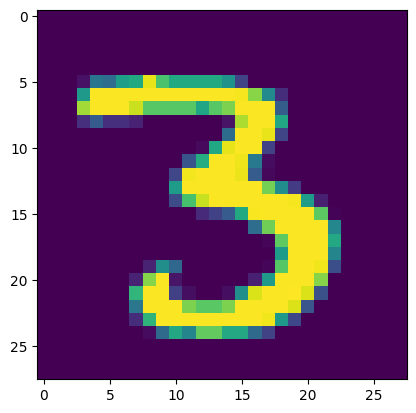

In [72]:
plt.imshow(x_train[12, :, :])
print(y_train[12])

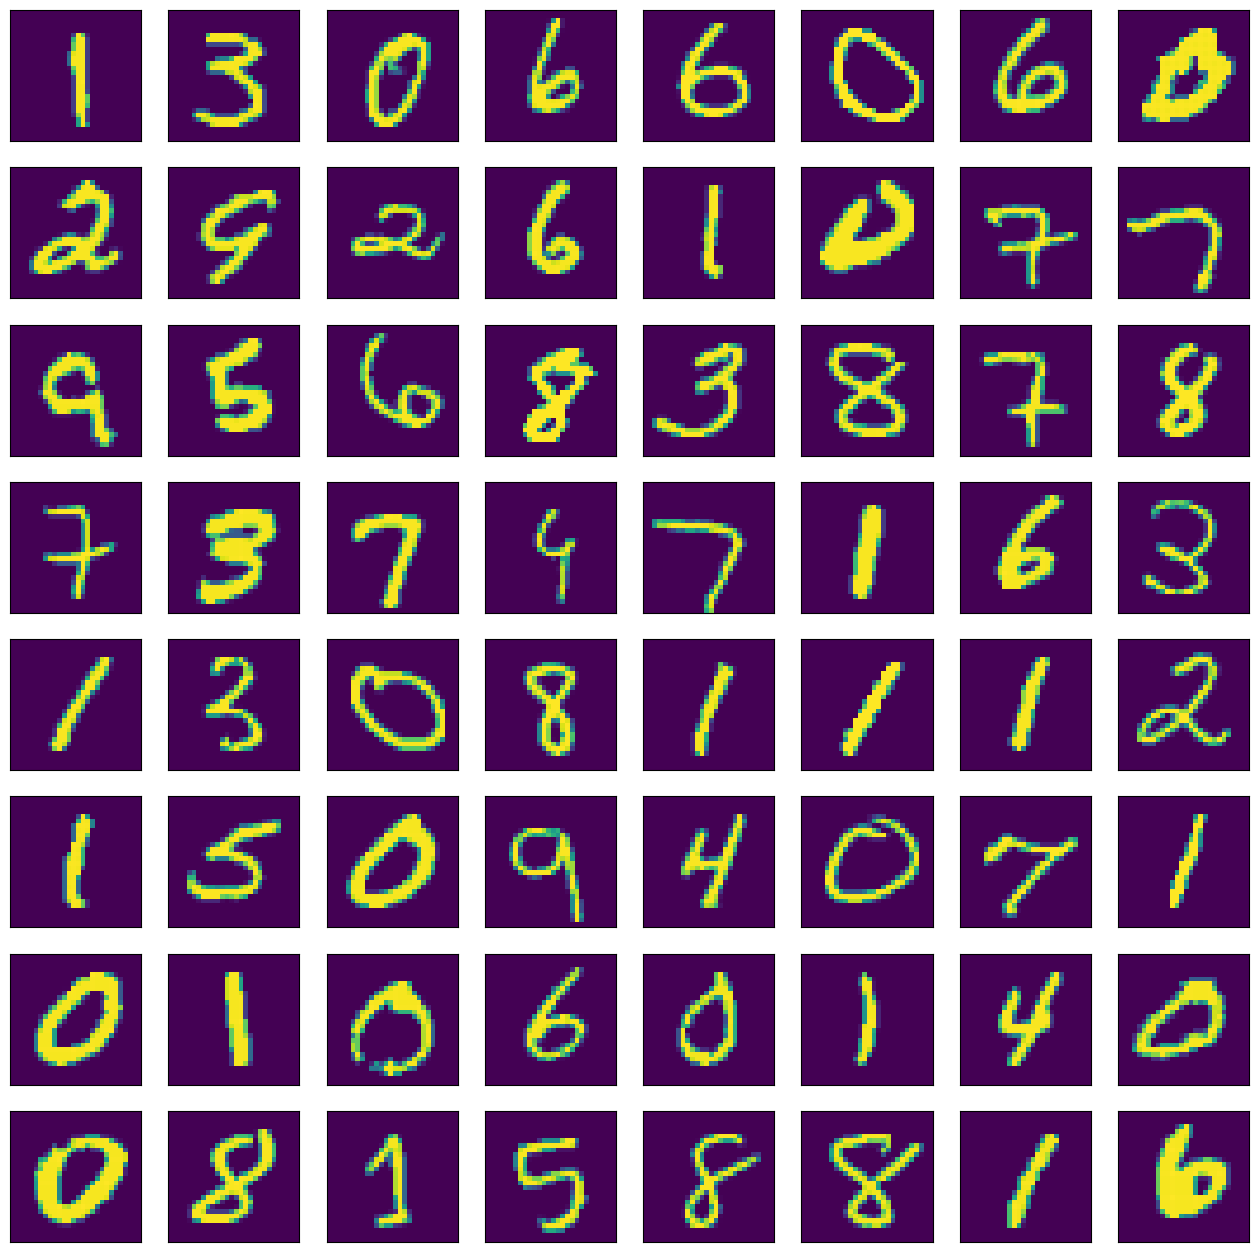

In [73]:
nrows, ncolumns = 8, 8
f, ax = plt.subplots(nrows, ncolumns, figsize=(16,16))
digit_inds = np.random.choice(np.arange(x_train.shape[0]), nrows * ncolumns)
i = 0
for row in range(nrows):
    for col in range(ncolumns):
        ax[row, col].imshow(x_train[digit_inds[i]])
        ax[row, col].set_xticks([])
        ax[row, col].set_yticks([])
        i += 1

## How would we build a feedforward network for this problem?
# $ \\ $
## Let's process the data

In [74]:
from tensorflow.keras.utils import to_categorical


def preprocess_training_data(data):
    data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
    data = data.astype("float32") / 255.0
    return data


def preprocess_targets(target, num_classes):
    return to_categorical(target, num_classes)


x_train = preprocess_training_data(x_train)
x_test = preprocess_training_data(x_test)
print(x_train.shape)

y_train_ohe = preprocess_targets(y_train, num_classes)
y_test_ohe = preprocess_targets(y_test, num_classes)

(60000, 784)


In [75]:
train_frac = 0.8
cutoff = int(x_train.shape[0] * train_frac)
x_train, x_val = x_train[:cutoff], x_train[cutoff:]
y_train, y_val = y_train[:cutoff], y_train[cutoff:]
y_train_ohe, y_val_ohe = y_train_ohe[:cutoff], y_train_ohe[cutoff:]

In [76]:
K.clear_session()
digit_input = Input(shape=(x_train.shape[1],))
hidden = Dense(256, activation="relu")(digit_input)
output = Dense(num_classes, activation="softmax")(hidden)
model = Model(digit_input, output)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [1]:
plot_model_in_notebook(model)

NameError: name 'plot_model_in_notebook' is not defined

In [77]:
model.fit(
    x_train, y_train_ohe,
    batch_size=512,
    validation_data=(x_val, y_val_ohe),
    epochs=10,
    shuffle=True,
)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7318 - loss: 0.9804 - val_accuracy: 0.9301 - val_loss: 0.2619
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9269 - loss: 0.2611 - val_accuracy: 0.9436 - val_loss: 0.2024
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9472 - loss: 0.1909 - val_accuracy: 0.9535 - val_loss: 0.1664
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9575 - loss: 0.1505 - val_accuracy: 0.9606 - val_loss: 0.1413
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9655 - loss: 0.1206 - val_accuracy: 0.9626 - val_loss: 0.1297
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9708 - loss: 0.1076 - val_accuracy: 0.9649 - val_loss: 0.1192
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9752 - loss: 0.0875 - val_accuracy: 0.9689 - val_loss: 0.1066
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9795 - loss: 0.0764 - val_accuracy: 0.9688 - val_loss:

# $ \\ $
# $ \\ $
# How well did we do with logistic regression (ie single-layer network)?
# $ \\ $
# $ \\ $
# How else can we approach this problem?
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $


# $ \\ $
# $ \\ $
# Our problem is inherently 2D
- ## Why would we use a 1D technique?

# $ \\ $
# Convolutional Neural Nets
# $ \\ $
## This is an "aside," as NLP isn't 2D, but it does contain sequential data, and we can apply related ideas to that problem
# $ \\ $
# $ \\ $
## Mathematically, the convolution of two functions is the overlap of one function $g$ as it is shifted over another function $f$
$$ (f \ast g)(t):=\int_{-\infty}^{\infty} f(\tau) g(t-\tau) d \tau$$
# $ \\ $
## Convolutional neural nets are a discrete (finite) version of this integral
### Worth becoming familiar with them, so here's a simple introduction 
- ### [intro to cnn](https://www.datacamp.com/tutorial/introduction-to-convolutional-neural-networks-cnns)

# $ \\ $
# EXAMPLE
# $ \\ $
## Let's start with the pixel representation of the digit `2`
<img src="two_as_pixels.png" alt="two-pixels" style="width:800px;"/>
# $ \\ $
# $ \\ $

## Now apply a "convolution," that is, a small matrix/kernel applied to successive patches of this bigger matrix
# $ \\ $
<img src="cnn_demo.png" alt="cnn-demo" style="width:800px;"/>

# $ \\ $
# $ \\ $
## Now we do a "smoothing operation", taking the max among blocks of the convoluted matrix. This is called `MaxPooling` and we will use it later for NLP
### Note: the numbers are wrong, but that's okay for now
# $ \\ $
<img src="max_pooling.png" alt="max-polling" style="width:800px;"/>

# $ \\ $
## Finally, we add a fully-connected `Dense` layer and put it to output.

In [31]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
Conv2D?

Init signature:
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
2D convolution layer.

This layer creates a convolution kernel that is convolved with the layer
input over a 2D spatial (or temporal) dimension (height and width) to
produce a tensor of outputs. If `use_bias` is True, a bias vector is created
and added to the outputs. Finally, if `activation` is not `None`, it is
applied to the outputs as well.

Args:
    filters: int, the dimension of the output space (the number of filters
        in the convolution).
    kernel_size: int or tuple/list of 2 integer, specifying the size of the
        convolution windo

In [36]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to include the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create the CNN model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Dense Layer 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8998 - loss: 0.3185 - val_accuracy: 0.9828 - val_loss: 0.0497
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9816 - loss: 0.0585 - val_accuracy: 0.9885 - val_loss: 0.0377
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9883 - loss: 0.0368 - val_accuracy: 0.9894 - val_loss: 0.0307
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9913 - loss: 0.0259 - val_accuracy: 0.9917 - val_loss: 0.0241
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9932 - loss: 0.0219 - val_accuracy: 0.9909 - val_loss: 0.0294
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0302
Test Loss: 0.024058299139142036
Test Accuracy: 0.9916999936103821


In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [ ]:
plot_model_in_notebook(model)



# $ \\ $
# $ \\ $
# Another look at EMBEDDINGS
# $ \\ $
## Embeddings are at the heart of NLP in general and LLMs in particular
# $ \\ $
# $ \\ $
# $ \\ $
# Why do we need them?
# $ \\ $
## How many words are there in the English language?
# $ \\ $
### As an aside, how many do you need to know to
- ### Read a newspaper?
- ### Read a complex technical paper?
- ### Be considered "well-educated?"
# $ \\ $

## Let's revisit embeddings and see what we can find
# $ \\ $
## We start with the usual IMDB movie sentiment database


In [38]:
import io
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization


## You should download the dataset from this URL
### I've commented out the next 3 cells for now. Uncomment them for your use!

In [ ]:
# url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

# dataset = tf.keras.utils.get_file("aclImdb_v1.tar.gz", url,
#                                   untar=True, cache_dir='.',
#                                   cache_subdir='')

# dataset_dir = os.path.join(os.path.dirname(dataset), '../data/aclImdb')
# os.listdir(dataset_dir)

In [ ]:
# train_dir = os.path.join(dataset_dir, 'train')
# os.listdir(train_dir)


In [ ]:
# remove_dir = os.path.join(train_dir, 'unsup')
# shutil.rmtree(remove_dir, ignore_errors=True)


## Split into test/train and batch appropriately

In [39]:
batch_size = 1024
seed = 123
train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', batch_size=batch_size, validation_split=0.2,
    subset='training', seed=seed)
val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', batch_size=batch_size, validation_split=0.2,
    subset='validation', seed=seed)


Found 75000 files belonging to 3 classes.
Using 60000 files for training.
Found 75000 files belonging to 3 classes.
Using 15000 files for validation.


In [40]:
for text_batch, label_batch in train_ds.take(1):
  for i in range(5):
    print(label_batch[i].numpy(), text_batch.numpy()[i][:300], '\n\n')


1 b"Ask yourself where she got the gun? Remember what she was taught about the mark's mindset when the con is over? The gun had blanks and it was provided to her from the very beginning.<br /><br />When the patient comes back at the end she was SUPPOSED to see him drive away in the red convertible and l" 


2 b'For some reason, people seem to have a problem differentiating this movie from Trail of the Pink Panther.<br /><br />At any rate, this work does nothing but serve to remind us how sad the world is without Peter Sellers in it.<br /><br />They brought back the same old favorites from Trail (Dreyfus, C' 


2 b'Jimeoin is a nameless actor who finds himself as the eternal extra\xc2\x85 never to play a principle role in a movie. He finds himself caught up with a group of would-be stars all trying to gain a break but none of them are able to do so.<br /><br />I was ready for a good comedy, but was bitterly disappoi' 


2 b'"And I\'ve had vould have gotten avay vith it, too, if it veren

2024-10-28 15:42:27.489851: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### A little bit of Keras magic to (maybe) make things run faster

In [41]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


## Create an embedding layer with a 1,000 word "vocabulary"

In [42]:
# Embed a 1,000 word vocabulary into 5 dimensions.
embedding_layer = tf.keras.layers.Embedding(1000, 5)


In [43]:
result = embedding_layer(tf.constant([1, 2, 3]))
result.numpy()


array([[ 0.03993589, -0.03464663, -0.01157125,  0.0234963 ,  0.00235854],
       [-0.04195505,  0.03904362,  0.01885032, -0.01816   , -0.00246539],
       [ 0.00524762, -0.01149366, -0.02542776, -0.00804927, -0.03615846]],
      dtype=float32)

In [44]:
result = embedding_layer(tf.constant([[0, 1, 2], [3, 4, 5]]))
result.shape


TensorShape([2, 3, 5])

In [45]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation), '')


# Vocabulary size and number of words in a sequence.
vocab_size = 40000
sequence_length = 100

# Use the text vectorization layer to normalize, split, and map strings to
# integers. Note that the layer uses the custom standardization defined above.
# Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_ds = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)


2024-10-28 15:42:46.595882: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Here's our model

In [48]:
embedding_dim=64

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  GlobalAveragePooling1D(),
  # Dense(16, activation='relu'),
  Dense(16, activation='relu',
    kernel_regularizer=l2(1e-3)),
  Dropout(0.2),
  Dense(1)
])


In [49]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [51]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[tensorboard_callback])


Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.1675 - loss: -0.9781 - val_accuracy: 0.1690 - val_loss: -9.1667
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.1683 - loss: -16.8485 - val_accuracy: 0.1690 - val_loss: -53.2130
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.1683 - loss: -76.9657 - val_accuracy: 0.1690 - val_loss: -170.3256
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.1683 - loss: -220.5932 - val_accuracy: 0.1690 - val_loss: -398.8183
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.1683 - loss: -486.3073 - val_accuracy: 0.1690 - val_loss: -776.0026
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.1683 - loss: -910.8451 - val_accuracy: 0.1690 - val_loss: -1336.2473
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.1683 - loss: -1526.0017 - val_accuracy: 0.1690 - val_loss: -2112.9045
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.1683 - l

In [52]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 64)        │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,683,173 (29.31 MB)

 Trainable params: 2,561,057 (9.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,122,116 (19.54 MB)

In [ ]:
plot_model_in_notebook(model)

In [53]:
weights = model.get_layer('embedding').get_weights()[0]
vocab = vectorize_layer.get_vocabulary()
len(vocab)

40000


# $ \\ $
# $ \\ $
# $ \\ $
# Now let's use the GloVe (Global Vectors for Word Representation) word embeddings, specifically the GloVe.6B dataset
- ## Developed in 2014 by the Stamford Natural Language Processing Group
- ## High-quality, widely used
- ## Pretrained on a massive dataset of 6B words
- ## Easy to integrate into this task!
# $ \\ $

In [ ]:
## Uncomment these lines for your own analysis - it takes 15-20 minutes to download
# !wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
# !unzip -q glove.6B.zip


In [ ]:
path_to_glove_file = "glove.6B.200d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

In [ ]:
num_tokens = len(vocab) + 2
embedding_dim = 200
hits = 0
misses = 0

word_index = dict(zip(vocab, range(len(vocab))))

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))



In [ ]:
from keras.layers import Embedding

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    trainable=False,
)
embedding_layer.build((1,))
embedding_layer.set_weights([embedding_matrix])


In [47]:
import keras
from keras import layers
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.regularizers import l2, l1, l1_l2

model = Sequential([
  vectorize_layer,
  embedding_layer,
  Conv1D(128, 9, activation="relu"), # Keras will learn 128 different "kernels", each of dimenson 
  MaxPooling1D(9),
  Conv1D(128, 9, activation="relu"),
  GlobalMaxPooling1D(),
  Dense(16, activation='relu',
    kernel_regularizer=l2(1e-3)),
  Dropout(0.2),
  Dense(1)
])



In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

lr = ReduceLROnPlateau(patience=1, verbose=True)
es = EarlyStopping(patience=2, verbose=True)

In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[tensorboard_callback, lr, es])


In [ ]:
model.summary()

In [ ]:
conv_layer = model.layers[2]
filters = conv_layer.weights[0].numpy()
filters.shape
# filters[:,0,0]

In [ ]:
plt.figure(figsize=(28, 10))
for i in range(filters.shape[2]):  # Iterate over each filter
    plt.subplot(8, 16, i + 1)  # Adjust grid size as needed
    plt.plot(filters[:, :15, i].squeeze())  # Plot the filter as a line graph
    plt.axis('off')  # Turn off axis labels
plt.tight_layout() 
plt.show()

In [ ]:
plot_model_in_notebook(model)

In [ ]:
from transformers import BertTokenizer, BertModel
from bert_score import BERTScorer

scorer = BERTScorer(model_type='bert-base-uncased', lang='english')
hypotheses = ["A brown fox jumps over a dog"]
references = ["A quick brown dog jumps over the lazy fox"]
P, R, F1 = scorer.score(hypotheses, references)
print(f"BERTScore Precision: {P.mean():.4f}, Recall: {R.mean():.4f}, F1: {F1.mean():.4f}")

# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $
# Deep Learning in Practice: not always so easy
 - ## There is no silver bullet


# $ \\ $
## Why?
 - ## Neural networks fail silently
 - ## Neural networks are black box and therefore hard to debug
 - ## Backpropagation of gradients and a good optimizer doesn't guarantee anything
   - ## This should not be surprising given $\frac{N_{\rm params}}{N_{\rm observations}} \gg 1$
 - ## Problems are generally not framed as nicely as IMDB sentiment classification
   - ## Think about how to frame the self-driving car problem
   - ## What is a "good" article summary?
   - ## What does it mean to surface the "right" document for a given query?

# $ \\ $
# $ \\ $
# There are things you can do to make it a little more robust
 - ## [Andrej Karpathy's Recipe](http://karpathy.github.io/2019/04/25/recipe/)

# $ \\ $
# The Recipe:
## 1. Become one with the data
 - ## The more time you spend looking at the data the better you'll do.
 - ## Find corrupt data, duplicates
   - ## Real example: lots of training examples that say "please enable javascript to view this page"
   - ## If 1% of your training data have some error mode, you'll need to look at ~1% of the data to find it
 - ## Label data yourself to get a sense for difficult the task is and where you fail

# $ \\ $
# $ \\ $
## 2. Set up an end to end training / evaluation pipeline and set benchmarks
 - ## We need code we are confident will accurately evaluate a model
 - ## Make dumb and less dumb baselines
   - ## constant guess
   - ## linear model
   - ## all zeros
 - ## Step (1) will have given us better intuition for what our benchmarks should be
 - ## This step reduces the surface area of neural network modeling efforts and reduces errors
 - ## Tips and tricks:
   - ## Fix a random seed (helps with reproducibility)
   - ## Don't try anything fancy (e.g. bagging a bunch of classifiers)
   - ## Add significant digits to evaluation code: Does a loss of .3002481 mean anything?
   - ## Verify the initial loss
   - ## Monitor human-interpretable metrics and compare them to human performance
   - ## Overfit on small amount of data: the network should be able to memorize it
   - ## visualize your data right before it goes to the network (i.e. from the training data generator)

# $ \\ $
# $ \\ $
## 3. Overfit
 - ## Choose a model that is large enough to overfit the training data
   - ## training loss < validation loss
 - ## If you can't overfit something is wrong!
 - ## Tips and tricks
   - ## Picking a model: Don't be a hero, steal from other people.
   - ## The adam optimizer is a good choice
   - ## Add ONE piece of complexity at once. Don't simultaneous make every layer 2x larger and 2x the number of layers

# $ \\ $
# $ \\ $
## 4. Regularize
 - ## Once we can overfit, we can sacrifice some training loss for val loss.
 - ## Tips and tricks
   - ## Get more data. If possible, this is the easiest way to regularize
   - ## Augment your data: if you can't get more data, make up some fake data
   - ## Reduce the input dimension (e.g. vocab size)
   - ## Decrease model size
   - ## Weight decay
   - ## Dropout
   - ## Early stopping

# $ \\ $
# $ \\ $
## 5. Tune
 - ## Tune hyperparameters to optimize the network
 - ## Random search is better than grid search
 - ## There are fancy packages out there to help you

# $ \\ $
# $ \\ $
## 6. Squeeze the juice (we won't do much of this)
 - ## Ensemble several models
 - ## Let it train for a long time



# $ \\ $
# $ \\ $
# Recap
# $ \\ $
# $ \\ $
# Deep Learning:
 - ## A new way to think about ML where we sequentially learn feature representations
 - ## Logical extension of our way of thinking about ML

Sequential Features             |  Evolution
:-------------------------:|:-------------------------:
<img src="deep-learning.png" width="700">  |  ![](./ml-evolution.jpg)

# $ \\ $
# $ \\ $
## Keras makes this easy since it allows for arbitrary matrix operations
 - ## We don't only need sequential networks

# $ \\ $
# $ \\ $
## We had models with scary numbers of free parameters
## Preventing overfitting is really important
 - ## 3-fold cross validation
 - ## Weight decay reduces variance
 - ## Dropout makes sure parameters really matter
 - ## Early stopping to prevent overtraining
 - ## Smarter network design

# $ \\ $
# $ \\ $

## The mechanics of DL
 - ## Hard in practice because it's a black box
 - ## There are good rules of thumb and recipes to make sure we do things right

# $ \\ $
# $ \\ $
## Deep learning works really well
 - ## SOTA on lots of problems
 - ## "free juice"


# $ \\ $
# $ \\ $
# The rest of DL for NLP
 - ## Find more sophisticated matrix operations
 - ## Find better ways to represent text

## We'll see that the line between these two will blur